# Tesla (TSLA) stock price prediction using ARIMA model

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

In [3]:
#### Use the Ticker symbol "TSLA" to access 3 year daily data starting from '2015-07-10' to '2020-07-09') from YAHOO FINANCE.
#### Convert index into column Date and remove the index.
#### PRINT THE FIRST 5 ROWS

tsla_df = yf.download('TSLA', start='2015-07-11', end='2020-07-10', progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


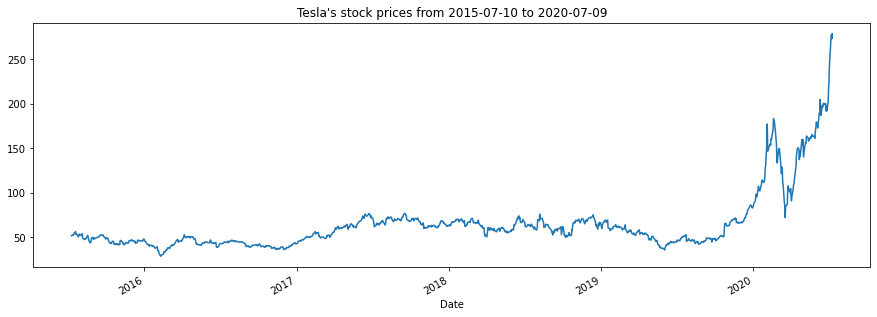

In [4]:
plt.figure(figsize=(15,5))

tsla_df['Close'].plot(title="Tesla's stock prices from 2015-07-10 to 2020-07-09")

plt.show()

##### Section 3.1
Plot the cross correlation of the Close price with a lag of 3
Is there any observable correlation in the data with lag 3? Is this data suitable for time-series modeling?

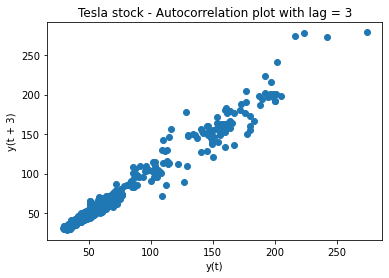

The data is suitable for time-series modeling (ARIMA) as there is auto-correlation in the data.


In [5]:
#### Write the code for 3.1

plt.figure()

lag_plot(tsla_df['Close'], lag=3)

plt.title('Tesla stock - Autocorrelation plot with lag = 3')

plt.show()

print('The data is suitable for time-series modeling (ARIMA) as there is auto-correlation in the data.')

##### Section 3.2 Fitting an ARIMA Model

a. Split the data into training and test sets in the ratio 0.7:0.3.

b. Use the Close price column for the training and test set data.

c. Create a list called history which takes in all Close values in training data

d. Create an empty list called model_predictions

e. Loop through each point in the test set

f. Fit an ARIMA model with order parameters (4,1,0) on the history list

g. Get the model forecast output

h. Append the model output to the model_predictions list

i. Get the actual value at the current point in the loop and append it to history list and repeat the loop

In [6]:
#### Write the code for 3.2a

train_data, test_data = tsla_df[0:int(len(tsla_df)*0.7)], tsla_df[int(len(tsla_df)*0.7):]

In [7]:
#### Write the code for 3.2b

training_data = train_data['Close'].values

test_data = test_data['Close'].values

In [8]:
#### Write the code for 3.2c

history = [x for x in training_data]

test_datapoints = len(test_data)

In [9]:
#### Write the code for 3.2d

model_predictions = []

In [10]:
#### Write the loop for 3.2e to 3.2i

for datapoint in range(test_datapoints):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    result = model_fit.forecast()
    a = result[0]
    model_predictions.append(a)
    test_point = test_data[datapoint]
    history.append(test_point)

##### Section 3.3
Plot the test set data in red and overlay the model predictions in blue

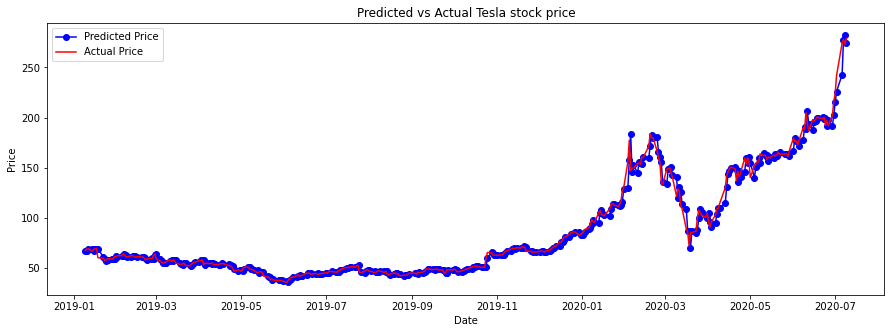

In [11]:
#### Write the code for 3.3

plt.figure(figsize=(15,5))
test_set = tsla_df[int(len(tsla_df)*0.7):].index
plt.plot(test_set, model_predictions, color='blue', marker = 'o', linestyle='-',label='Predicted Price')
plt.plot(test_set, test_data, color='red', label='Actual Price')
plt.title('Predicted vs Actual Tesla stock price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()